In [1]:
import sys
sys.path.append('/home/iaw/MYscrip/WatAna')
import os

In [2]:
from util.traj_xyz import *
from util.auto_corr_fft import *
from util.auto_corr_to_Iw import *
from util.read_qv import *

In [3]:
def save_Ct(fp: str, tau: NDArray, Ct: NDArray) -> None:
    with open(fp, "w+") as F:
        for i, i_x in enumerate(tau):
            F.writelines("{:.6f}, {:.6f}\n".format(i_x, Ct[i]))
            
def save_Ir(fp: str, title: str, freq, Iw_s: List) -> None:
    with open(fp, "w+") as F:
        F.writelines(title)
        for f, intensities in zip(freq, Iw_s):
            parts = ["{:.6f}".format(f)] + ["{:.6f}".format(i) for i in intensities]
            line = ", ".join(parts) + "\n"
            F.write(line)

In [4]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [5]:
plt.rcParams["axes.labelweight"] ="bold" 
plt.rcParams["font.family"]="Times New Roman" 
plt.rcParams["font.weight"]="bold" 
plt.rcParams["font.size"]=14 
plt.rcParams["mathtext.default"]="regular"


def init_fig(ax):
    ax.spines['left'].set_position(('axes',0))
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.tick_params(which='major'          # 设置对主刻度和次刻度生效
                        ,bottom=True           # 底部坐标轴
                        ,left=True             # 左侧坐标轴
                        , right = True
                        , top = True
                        ,direction='in'       # 设置刻度线方向，'in' 表示朝内
                        ,width=2               # 设置刻度线粗细
                        ,length=8              # 设置长短
                        ,labelsize=20
    
                        )
    ax.tick_params(which='minor'          # 设置对主刻度和次刻度生效
                        ,bottom=True           # 底部坐标轴
                        ,left=True             # 左侧坐标轴
                        , right = True
                        , top = True
                        ,direction='in'       # 设置刻度线方向，'in' 表示朝内
                        ,width=2               # 设置刻度线粗细
                        ,length=5              # 设置长短
                        ,labelsize=20

                        )
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(250))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

    return ax


# 加载数据

## 实验数据

In [6]:
exp_data = np.loadtxt("./data/exp_h2o.csv", delimiter=",")

## PBE的数据

### 45ps

In [7]:
pbe_mulliken_50ps = pbe_mulliken_config(
      dt = 0.0005   # ps
    , vel_f= "/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/all-vel.xyz"
    , mulliken_f = "/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/pbe_64_50ps_zjb_mulliken.npy"
    , n_read = 100000 
    , qv_save = "./out/pbe_mulliken_50ps_qv.npy"
)
pbe_mulliken_50ps_Ct_save = "./out/pbe_mulliken_50ps_Ct.csv"
if not os.path.exists(pbe_mulliken_50ps.qv_save):
    qv_50ps_pbe_mulliken = qv_pbe_mulliken(pbe_mulliken_50ps)
else:
    qv_50ps_pbe_mulliken = np.load(pbe_mulliken_50ps.qv_save)
# autocorr
Ct_50ps_pbe_mulliken = auto_corr_fft(qv_50ps_pbe_mulliken, fraction_autocorrelation_function_to_fft = 0.1)
tau_50ps_pbe_mulliken = np.array(list(range(Ct_50ps_pbe_mulliken.shape[0])), dtype=np.float64) * pbe_mulliken_50ps.dt
# save
save_Ct(pbe_mulliken_50ps_Ct_save, tau_50ps_pbe_mulliken, Ct_50ps_pbe_mulliken)
# autocorr + hann
Ct_50ps_pbe_mulliken_hann = auto_corr_hann(Ct_50ps_pbe_mulliken)
# autocorr -> Ir
Iw_pbe_mulliken_50ps_hann = fft_to_Iw(tau_50ps_pbe_mulliken, Ct_50ps_pbe_mulliken_hann)
Iw_pbe_mulliken_50ps_wohann = fft_to_Iw(tau_50ps_pbe_mulliken, Ct_50ps_pbe_mulliken)

In [8]:
pbe_50ps = pbe_config(
      dt = 0.0005   # ps
    , xyz_f= "/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/50ps-pos.xyz"
    , n_read = 100000 
    , qv_save = "./out/pbe_50ps_qv.npy"
)
pbe_50ps_Ct_save = "./out/pbe_50ps_Ct.csv"
if not os.path.exists(pbe_50ps.qv_save):
    qv_50ps_pbe = qv_pbe(pbe_50ps)
else:
    qv_50ps_pbe = np.load(pbe_50ps.qv_save)
# autocorr
Ct_50ps_pbe = auto_corr_fft(qv_50ps_pbe, fraction_autocorrelation_function_to_fft = 0.1)
tau_50ps_pbe = np.array(list(range(Ct_50ps_pbe.shape[0])), dtype=np.float64) * pbe_50ps.dt
# save
save_Ct(pbe_50ps_Ct_save, tau_50ps_pbe, Ct_50ps_pbe)
# autocorr + hann
Ct_50ps_pbe_hann = auto_corr_hann(Ct_50ps_pbe)
# autocorr -> Ir
Iw_pbe_50ps_hann = fft_to_Iw(tau_50ps_pbe, Ct_50ps_pbe_hann)
Iw_pbe_50ps_wohann = fft_to_Iw(tau_50ps_pbe, Ct_50ps_pbe)

In [ ]:
pbe_mulliken_r_50ps = pbe_mulliken_r_config(
      dt = 0.0005   # ps
    , xyz_f= "/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/50ps-pos.xyz"
    , mulliken_f = "/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/mulliken/pbe_64_50ps_zjb_mulliken2.npy"
    , n_read = 100000 
    , qr_save = "./out/pbe_mulliken_50ps_qr2.npy"
)
pbe_mulliken_r_50ps_Ct_save = "./out/pbe_mulliken_r_50ps_Ct2.csv"
if not os.path.exists(pbe_mulliken_r_50ps.qr_save):
    qr_50ps_pbe_mulliken = qr_pbe_mulliken(pbe_mulliken_r_50ps)
else:
    qr_50ps_pbe_mulliken = np.load(pbe_mulliken_r_50ps.qr_save)

# 求导
u_d_50ps_pbe_mulliken = np.gradient(qr_50ps_pbe_mulliken, pbe_mulliken_r_50ps.dt, axis=0, edge_order=2) 
# autocorr
Ct_50ps_pbe_mulliken_r = auto_corr_fft(u_d_50ps_pbe_mulliken, fraction_autocorrelation_function_to_fft = 0.1)
tau_50ps_pbe_mulliken_r = np.array(list(range(Ct_50ps_pbe_mulliken_r.shape[0])), dtype=np.float64) * pbe_mulliken_r_50ps.dt
# save
save_Ct(pbe_mulliken_r_50ps_Ct_save, tau_50ps_pbe_mulliken_r, Ct_50ps_pbe_mulliken_r)
# autocorr + hann
Ct_50ps_pbe_mulliken_r_hann = auto_corr_hann(Ct_50ps_pbe_mulliken_r)
# autocorr -> Ir
Iw_pbe_mulliken_r_50ps_hann = fft_to_Iw(tau_50ps_pbe_mulliken_r, Ct_50ps_pbe_mulliken_r_hann)
Iw_pbe_mulliken_r_50ps_wohann = fft_to_Iw(tau_50ps_pbe_mulliken_r, Ct_50ps_pbe_mulliken_r)

In [94]:
from numpy.fft import fft, ifft, fftfreq
def u_d(M, dt):
    n = M.shape[0]
    w = 2j * np.pi * fftfreq(n, d=dt)          # (n_frames,)
    H = np.sinc(w * dt / np.pi) / dt           # (n_frames,)

    out = np.empty_like(M)
    for ax in range(3):                        # x/y/z 分别处理
        M_f = fft(M[:, ax])
        out[:, ax] = ifft(M_f * w / H).real
    return out


In [95]:
u_d_50ps_pbe_mulliken1 = np.gradient(qr_50ps_pbe_mulliken, pbe_mulliken_r_50ps.dt, axis=0, edge_order=2) 
u_d_50ps_pbe_mulliken2 = u_d(qr_50ps_pbe_mulliken, pbe_mulliken_r_50ps.dt) 

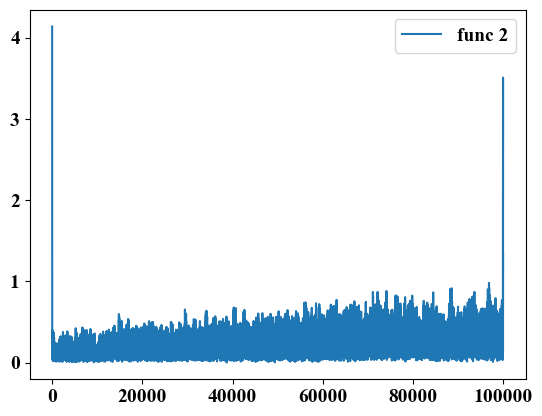

In [102]:
#plt.plot(list(range(100000)), np.linalg.norm(u_d_50ps_pbe_mulliken1, axis=1), label = "func 1")
plt.plot(list(range(100000)), np.linalg.norm(u_d_50ps_pbe_mulliken2, axis=1), label = "func 2")
plt.legend()

In [103]:
u_d_50ps_pbe_mulliken = u_d_50ps_pbe_mulliken2

In [104]:

# autocorr
Ct_50ps_pbe_mulliken_r = auto_corr_fft(u_d_50ps_pbe_mulliken, fraction_autocorrelation_function_to_fft = 0.1)
tau_50ps_pbe_mulliken_r = np.array(list(range(Ct_50ps_pbe_mulliken_r.shape[0])), dtype=np.float64) * pbe_mulliken_r_50ps.dt
# save
save_Ct(pbe_mulliken_r_50ps_Ct_save, tau_50ps_pbe_mulliken_r, Ct_50ps_pbe_mulliken_r)
# autocorr + hann
Ct_50ps_pbe_mulliken_r_hann = auto_corr_hann(Ct_50ps_pbe_mulliken_r)
# autocorr -> Ir
Iw_pbe_mulliken_r_50ps_hann = fft_to_Iw(tau_50ps_pbe_mulliken_r, Ct_50ps_pbe_mulliken_r_hann)
Iw_pbe_mulliken_r_50ps_wohann = fft_to_Iw(tau_50ps_pbe_mulliken_r, Ct_50ps_pbe_mulliken_r)

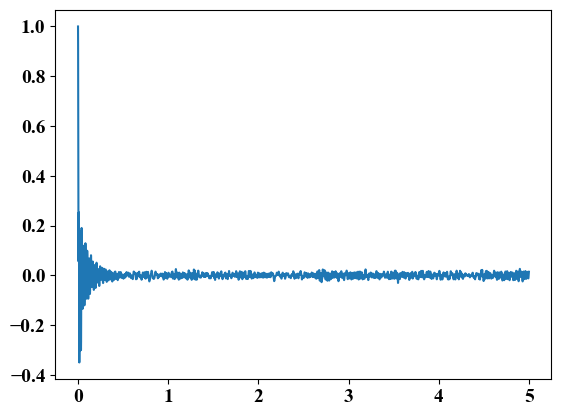

In [105]:
plt.plot(tau_50ps_pbe_mulliken, Ct_50ps_pbe_mulliken)

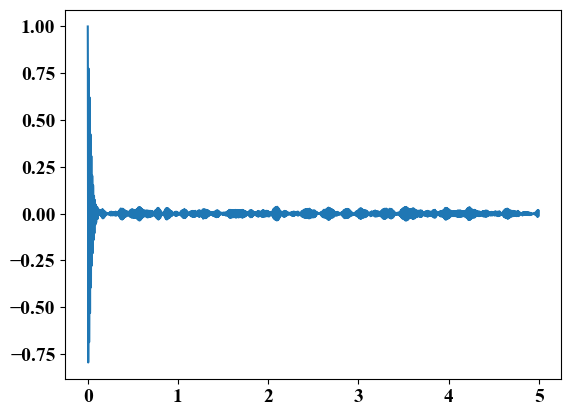

In [106]:
plt.plot(tau_50ps_pbe_mulliken_r, Ct_50ps_pbe_mulliken_r)

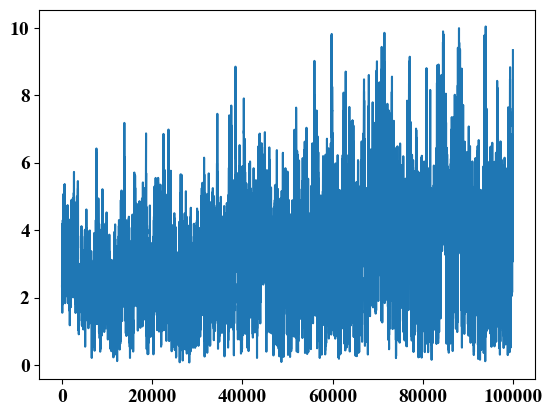

In [107]:
plt.plot(list(range(100000)), np.linalg.norm(qr_50ps_pbe_mulliken, axis=1))

In [108]:
np.argmax(np.linalg.norm(u_d_50ps_pbe_mulliken, axis=1)), np.argmin(np.linalg.norm(u_d_50ps_pbe_mulliken, axis=1))

(0, 38694)

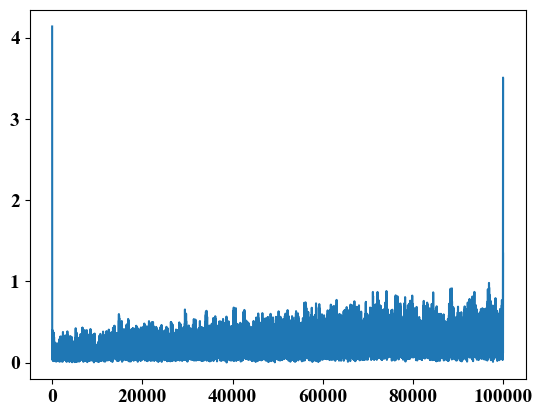

In [109]:
plt.plot(list(range(100000)), np.linalg.norm(u_d_50ps_pbe_mulliken, axis=1))

In [110]:
norm_func = lambda x: (x - x.min()) / (x.max() - x.min())

In [111]:
zjb_ir = np.loadtxt("/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/dipole/4/ir_spectrum_H2O_wannier.csv")

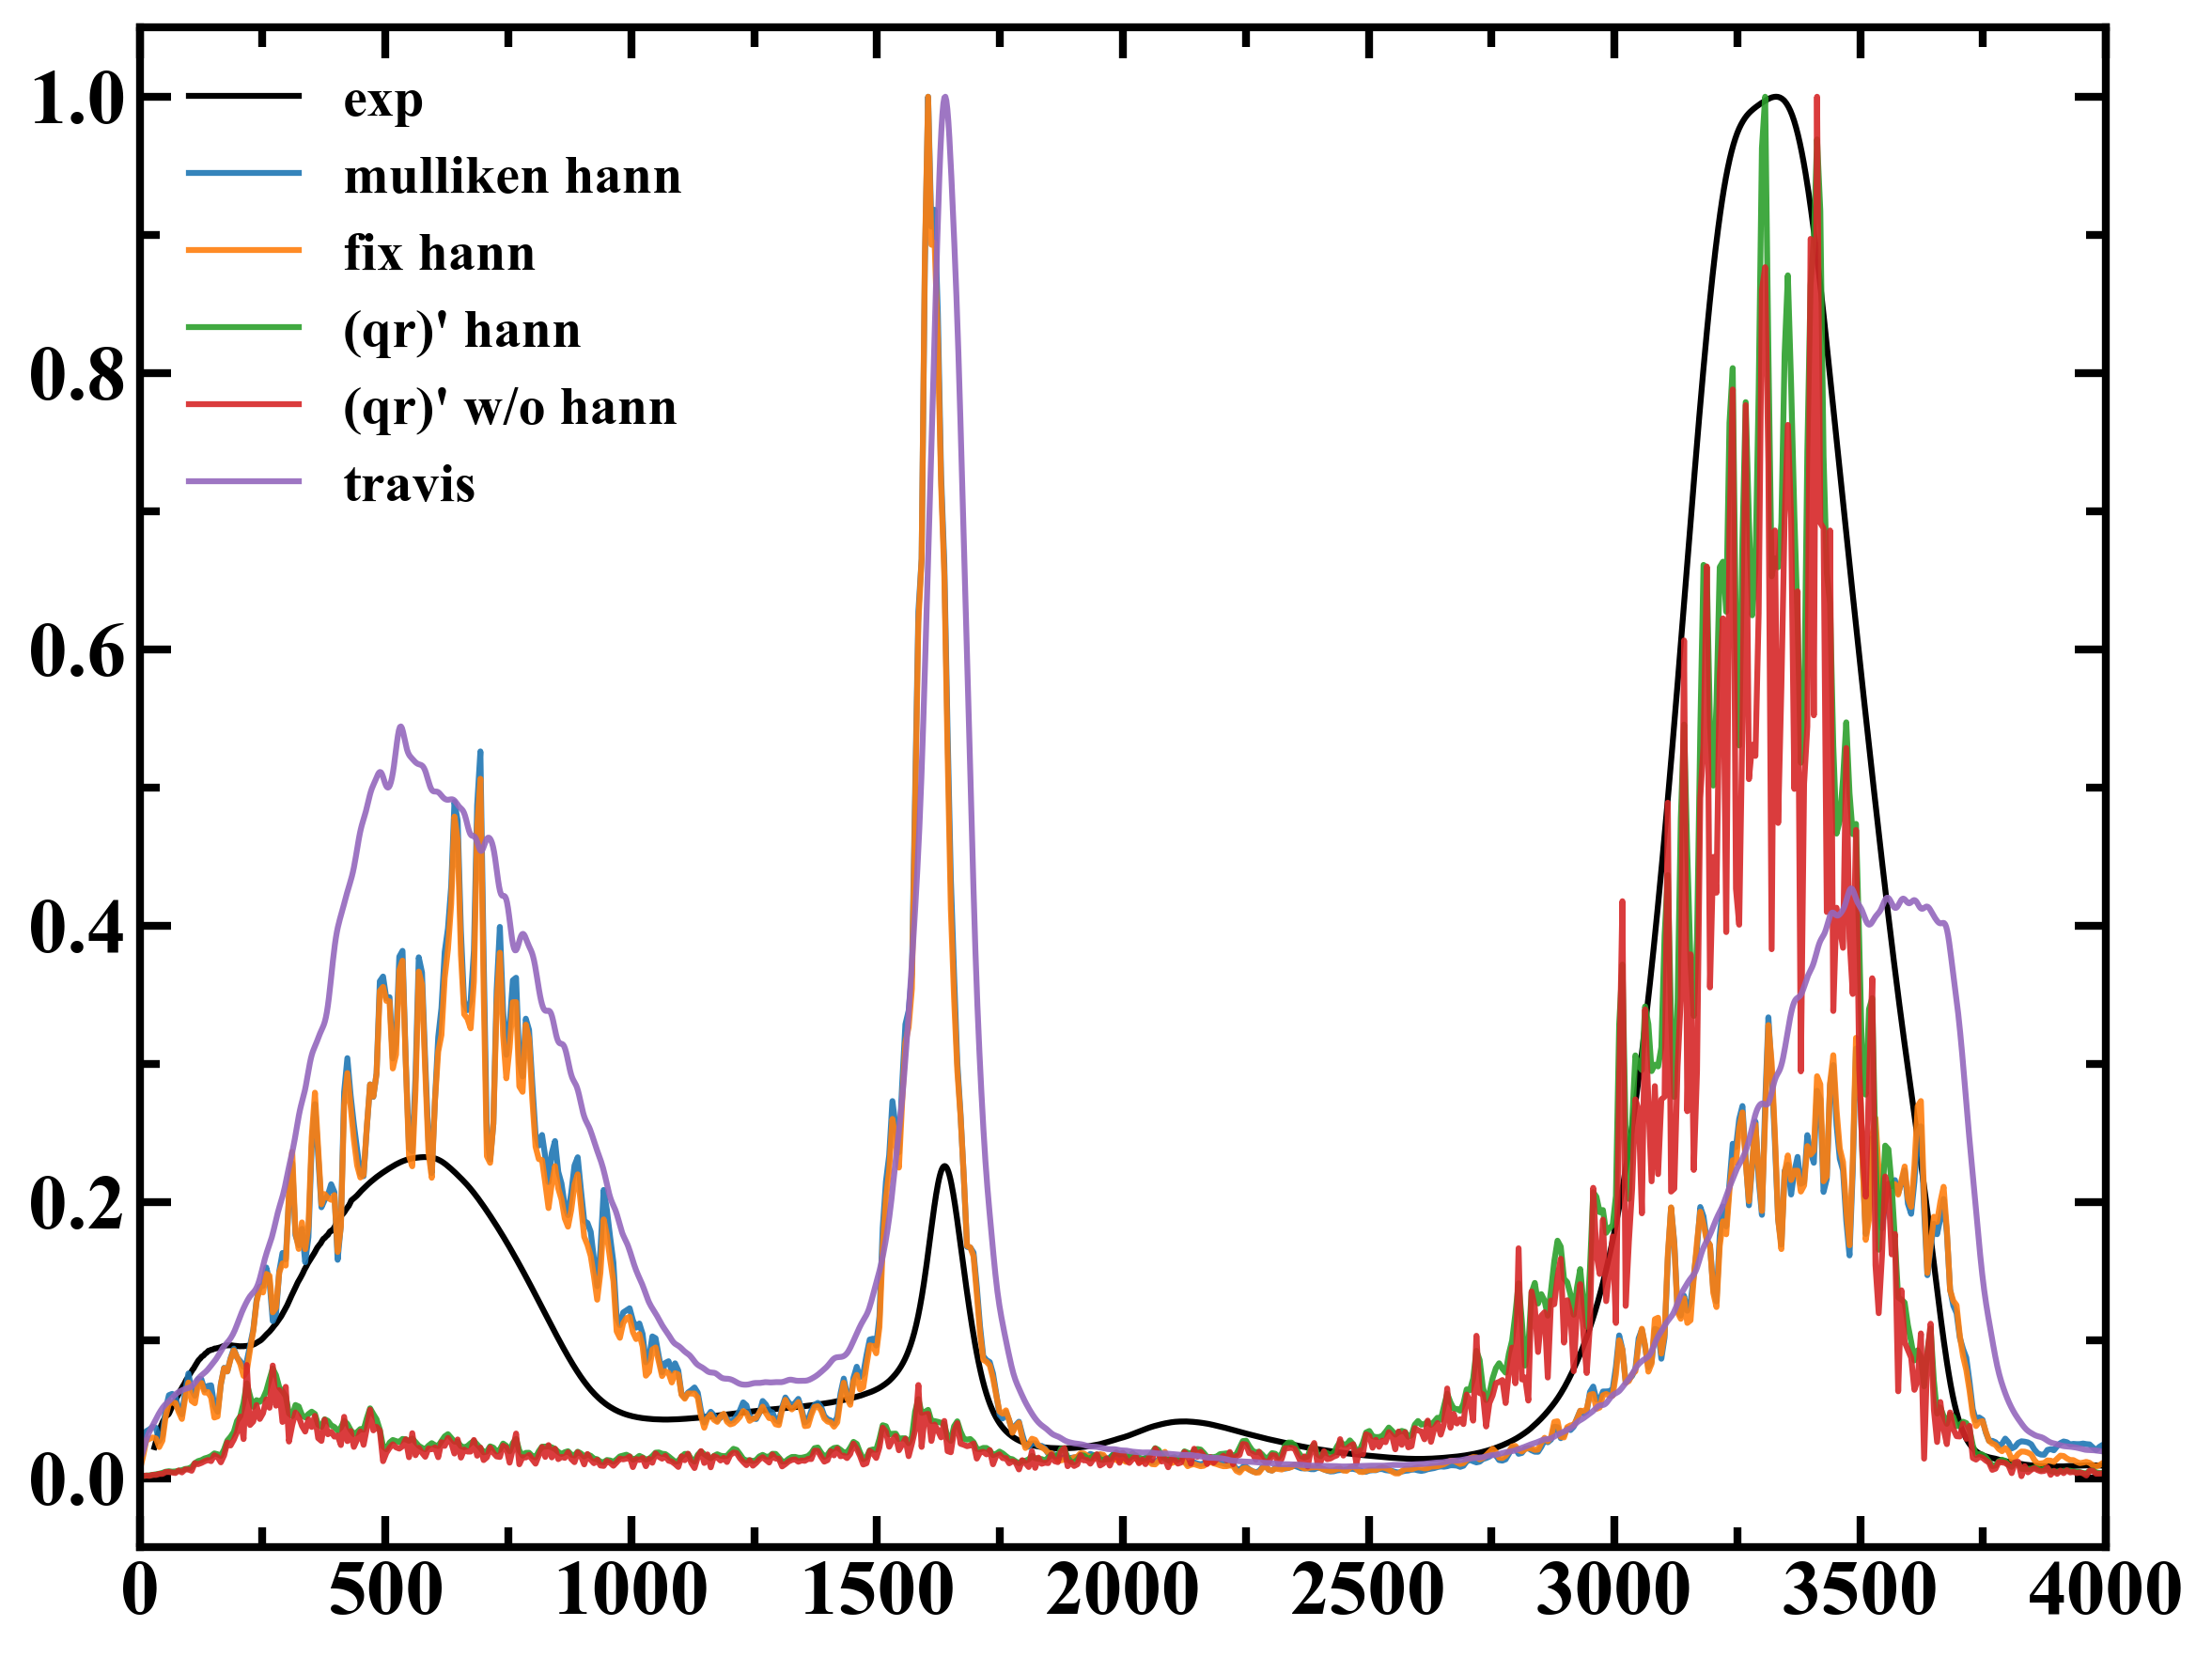

In [ ]:
exp_data_y_norm = norm_func(exp_data[:, 1])
Iw_pbe_mulliken_50ps_hann_norm = norm_func(Iw_pbe_mulliken_50ps_hann[1])
Iw_pbe_mulliken_50ps_wohann_norm = norm_func(Iw_pbe_mulliken_50ps_wohann[1])

Iw_pbe_50ps_hann_norm = norm_func(Iw_pbe_50ps_hann[1])
Iw_pbe_50ps_wohann_norm = norm_func(Iw_pbe_50ps_wohann[1])

Iw_pbe_mulliken_r_50ps_hann_norm = norm_func(Iw_pbe_mulliken_r_50ps_hann[1])
Iw_pbe_mulliken_r_50ps_wohann_norm = norm_func(Iw_pbe_mulliken_r_50ps_wohann[1])

zjb_ir_norm = norm_func(zjb_ir[:, 1])

#Iw_pbe_dipole_50ps_hann_norm = (Iw_pbe_dipole_50ps_hann1[1] -Iw_pbe_dipole_50ps_hann1[1].min())/(5- Iw_pbe_dipole_50ps_hann1[1].min())
#Iw_pbe_dipole_50ps_wohann_norm = (Iw_pbe_dipole_50ps_wohann1[1] -Iw_pbe_dipole_50ps_wohann1[1].min())/(5- Iw_pbe_dipole_50ps_wohann1[1].min())

fig = plt.figure(figsize=(9,7),dpi=300)
ax1= plt.gca()
ax1 = init_fig(ax1)

ax1.plot(exp_data[:, 0], exp_data_y_norm, label = "exp", c = "black")

ax1.plot(Iw_pbe_mulliken_50ps_hann[0], Iw_pbe_mulliken_50ps_hann_norm, label = "mulliken hann", alpha = 0.9)
ax1.plot(Iw_pbe_50ps_hann[0], Iw_pbe_50ps_hann_norm, label = "fix hann", alpha = 0.9)
ax1.plot(Iw_pbe_mulliken_r_50ps_hann[0], Iw_pbe_mulliken_r_50ps_hann_norm, label = "(qr)' hann", alpha = 0.9)
ax1.plot(Iw_pbe_mulliken_r_50ps_wohann[0], Iw_pbe_mulliken_r_50ps_wohann_norm, label = "(qr)' w/o hann", alpha = 0.9)
ax1.plot(zjb_ir[:, 0], zjb_ir_norm, label = "travis", alpha = 0.9)

plt.xlim([0, 4000])
plt.legend(frameon=False, ncol=1)
plt.show()

In [ ]:
M(t) = SUM u(t)
M'(t) 
u(t) = q*r
u'(t) = q*r' = q*v = J
u'(t) = q*r' + q'*r